# 0.0. Planejamento da Solução ( IOT )

## Input - Entrada

### O problema de negócio

1. Selecionar os mais valiosos clientes para formar o programa de fidelidade **"INSIDERS"**
2. Conjunto de dados com as vendas de produtos durante 1 ano ( Nov 2015 to Dec 2017 )

## Output - Saída

1. A indicação de pessoas para fazer parte do programa de fidelidade **"INSIDERS"**.
2. Relatório com as respostas para as seguintes perguntas:
    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Processo

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível ? O que é um cliente "valioso" para a empresa ?
        - Faturamento:
            - Alto Ticket Médio
            - Alto LTV
            - Baixa Recência ou Alta Frequência ( tempo entre as compras )
            - Alto Basket Size ( quantidade média de produtos comprados )
            - Baixa probabilidade de Churn
            - Previsão alta de LTV
            - Alta propensão de compra

        - Custo:
            - Baixo número de devoluções

        - Experiência:  
            - Média alta de avaliações
            
            
2. **Quantos clientes farão parte do grupo?**
    - Número de clientes
    - % em relação ao total de clients
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever os principais atributos dos clientes
        - Idade
        - País
        - Salário
        
    - Escrever os principais comportamentos de compra dos clients ( métricas de negócio )
        - Vide acima
    
    
4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Calcular o faturamento total da empresa durante o ano.
    - Calcular o faturamento (%) apenas do cluster Insiders.
    
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - Cálculo do LTV do grupo Insiders
    - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
    

6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Qual o período de avaliação ?
    - O "desempenho" do cliente está próximo da média do cluster Insiders. 
    
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - O "desempenho" do cliente não está mais próximo da média do cluster Insiders. 
    
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste de Hipóteses
    - Teste A/B
    
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Descontos
    - Preferências de escolha
    - Produtos exclusivos

# 0.0. Imports

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import umap.umap_ as umap

#from IPython.display import HTML
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import cluster as c
from sklearn import metrics as m

from plotly import express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


import warnings

# Suprimir FutureWarnings do scikit-learn
warnings.simplefilter(action='ignore', category=FutureWarning)


/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/raqueloliveira/miniconda3/e

## 0.1. Helper Functions

In [70]:
# Defina o tema de paleta que deseja usar
sns.set_palette("pastel")  # Substitua "pastel" pelo tema de paleta desejado


In [71]:
# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
    
#     plt.style.use( 'ggplot')
#     plt.rcParams['figure.figsize'] = [24, 9]
#     plt.rcParams['font.size'] = 24
    
#     display( HTML( '<style>.container { width:100% !important; }</style>') )
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option( 'display.expand_frame_repr', False )
    
#     sns.set()
    
# jupyter_settings()

## 0.2. Load dataset

In [72]:
# Carregar os dados brutos de um arquivo CSV com a codificação especificada
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='ISO-8859-1')

# Remover uma coluna extra 'Unnamed: 8'
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis=1)

# 1.0. Descrição dos dados

In [73]:
df1 = df_raw.copy()

## 1.1. Rename columuns

In [74]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

## 1.2. Data dimensions

In [75]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## 1.3. Data types

In [76]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [77]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [78]:
# Remover as linhas com valores ausentes nas colunas 'description' e 'customer_id'
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Dados removidos: {:.2f}'.format(1 - (df1.shape[0] / df_raw.shape[0])))


Dados removidos: 0.25


In [79]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change dtypes

In [80]:
# Converter a coluna 'invoice_date' para um formato de data com um formato de data específico
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# Converter a coluna 'customer_id' para números inteiros
df1['customer_id'] = df1['customer_id'].astype(int)
df1.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [81]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

# 2.0. Feature Engineering 

In [82]:
df2 = df1.copy()

## 2.1. Feature Creation

In [83]:
# Criar um conjunto de dados de referência eliminando colunas irrelevantes e removendo duplicatas
df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

# Calcular o 'gross_revenue' como o produto de 'quantity' e 'unit_price'
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Calcular o valor monetário agrupando por 'customer_id' e somando 'gross_revenue'
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
# Combinando os dados do valor monetário com o DataFrame de referência
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

# Calcular a recência encontrando a data da última compra e convertendo para dias
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

# Calcular a frequência contando os valores exclusivos de 'invoice_no' para cada cliente
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')


# Cálculo da média do valor do tíquete de cada cliente
df_avg_ticket = df2[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df_ref = pd.merge(df_ref, df_avg_ticket, on='customer_id', how='left')


# 3.0. Filtragem de Varivéis 

In [84]:
df3 = df_ref.copy()

# 4.0. EDA (Exploratory Data Analysis)

In [85]:
df4 = df3.copy()

# 5.0. Data Preparation 

In [86]:
df5 = df4.copy()

# 6.0. Feature Selection

In [87]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-Tunning

In [88]:
# Preparar os dados para a clusterização (X é sua matriz de recursos)
X = df6.drop(columns=['customer_id'])

In [89]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5288.63,302,35,16.950737
1,3079.10,31,18,15.709694
2,7187.34,2,18,28.634821
3,948.25,95,5,33.866071
4,635.10,330,6,105.850000


In [90]:
clusters = [2, 3, 4, 5, 6, 7]

## 7.1 WSS

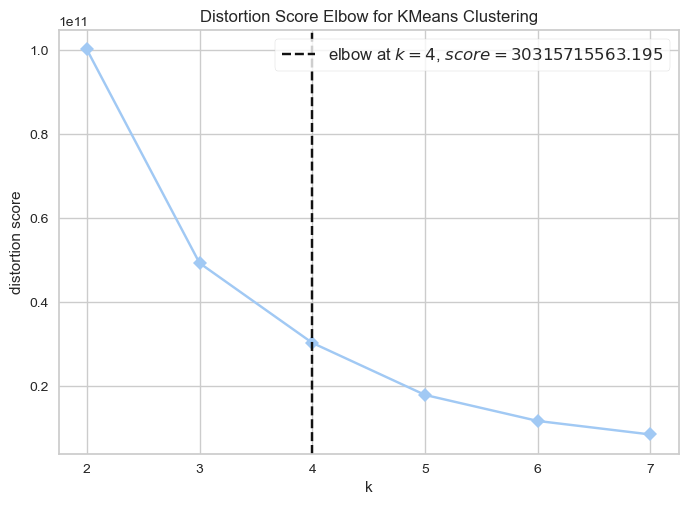

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
# Usar o KElbowVisualizer para determinar o número ideal de clusters (método do cotovelo)
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show()


## 7.2 Silhouette Score

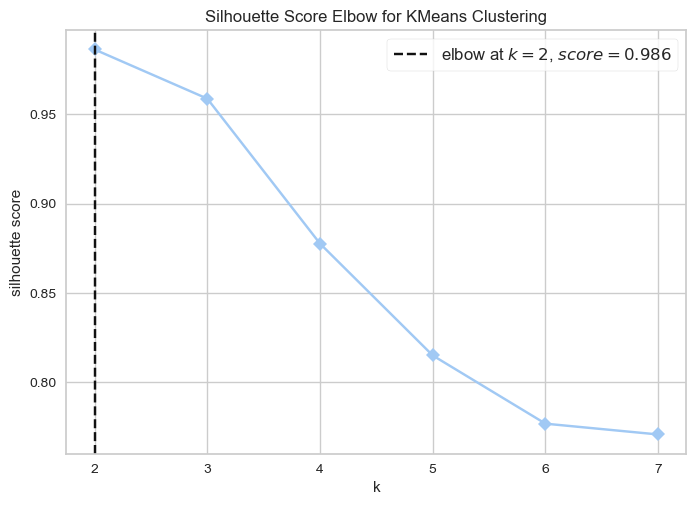

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [92]:
# Usar o KElbowVisualizer com a pontuação de silhueta como a métrica para determinar o número ideal de clusters
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

## 7.3. Silhouette Analysis

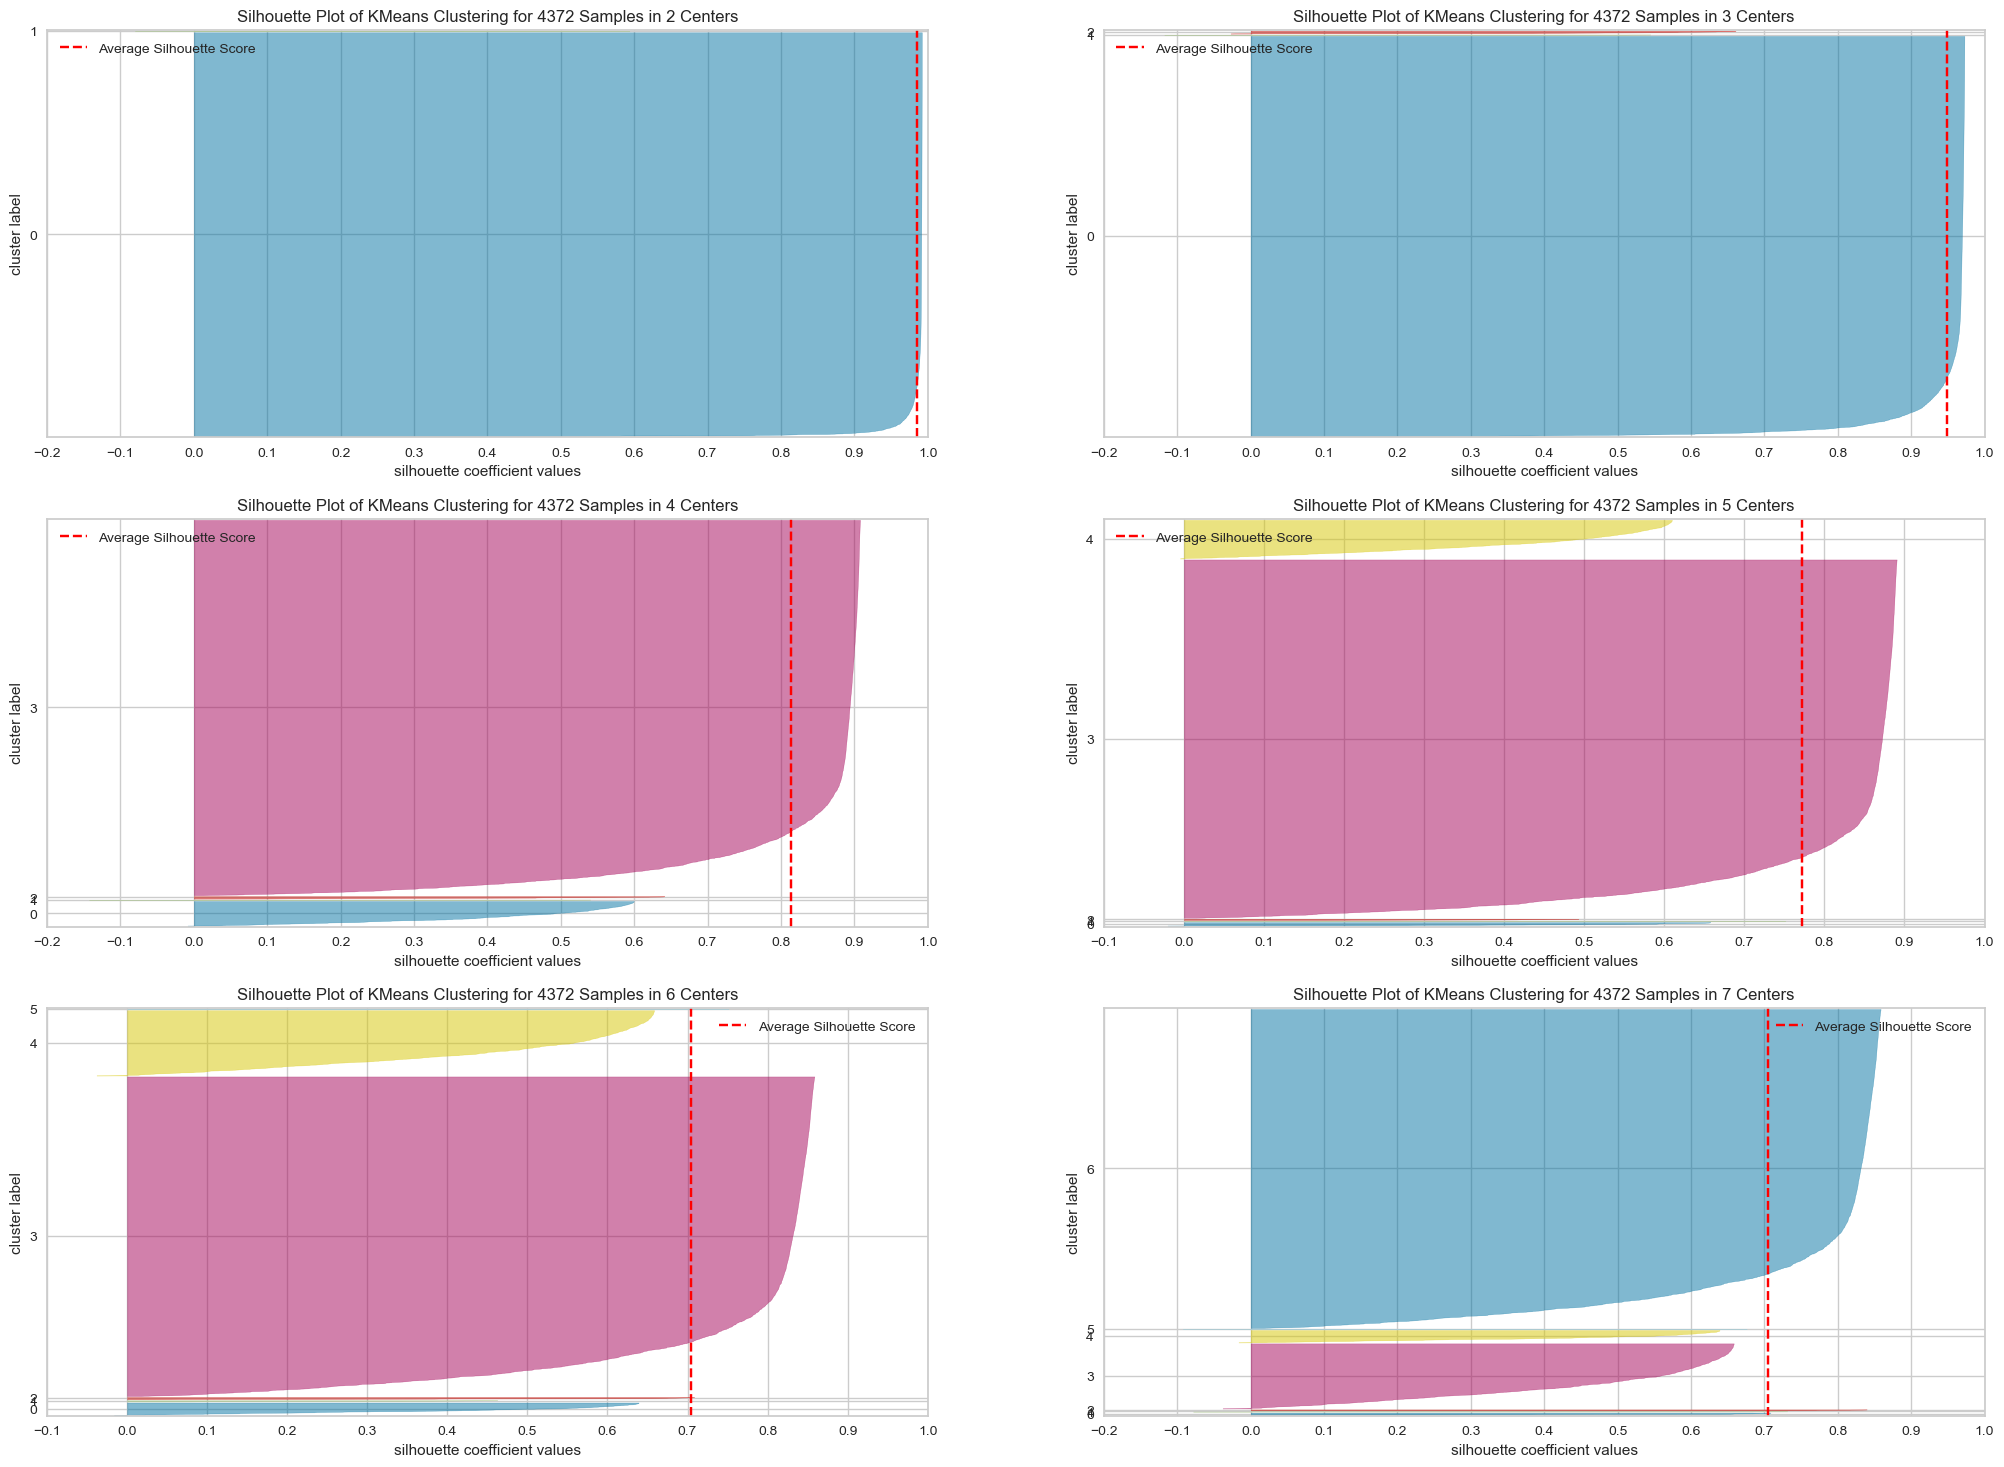

In [93]:
# Criando uma matriz de subplots com 3 linhas e 2 colunas para exibir gráficos
fig, ax = plt.subplots(3, 2, figsize=(25, 18))

# Loop através do número de clusters desejados
for k in clusters:
    # Criando um objeto KMeans com o número de clusters especificado
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    
    # Calculando a posição no subplot
    q, mod = divmod(k, 2)
    
    # Inicializando o visualizador de silhueta com cores 'yellowbrick'
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    
    # Ajustando o visualizador aos dados
    visualizer.fit(X)
    
    # Finalizando o visualizador para exibição
    visualizer.finalize()


# 8.0. Model Training

## 8.1. K-Means

In [94]:
# Definição do modelo
k = 4  # número de clusters
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300)

# Treinamento do modelo
kmeans.fit(X)  # X são os dados a serem clusterizados

# Clusterização
labels = kmeans.labels_  # labels é o array de atribuições de cluster

### 8.1.1. Cluster Validation

In [95]:
# Cálculo do WSS (Within-cluster sum of square)
print('WSS value: {}'.format(kmeans.inertia_))

# Cálculo do SS (Silhouette Score)
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 40056506734.60243
SS value: 0.8139972028952444


# 9.0. Cluster Analysis 

In [96]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,1
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,1
4,15100,635.10,330,6,105.850000,1


## 9.1. Visualization Inspection

/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


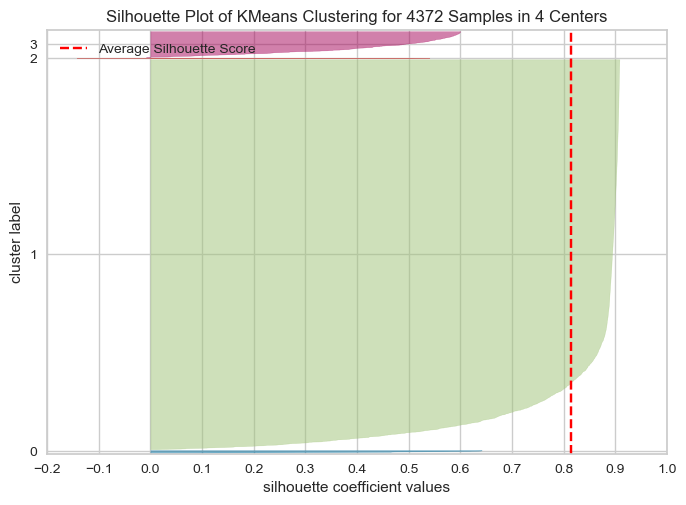

In [97]:
# Inicialização de um visualizador de silhueta com o modelo KMeans e cores 'yellowbrick'
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Ajustando o visualizador aos dados (X)
visualizer.fit(X)

# Finalizando o visualizador para exibir as métricas de silhueta
visualizer.finalize()


## 9.2. 2d Plot

/Users/raqueloliveira/miniconda3/envs/clustering_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


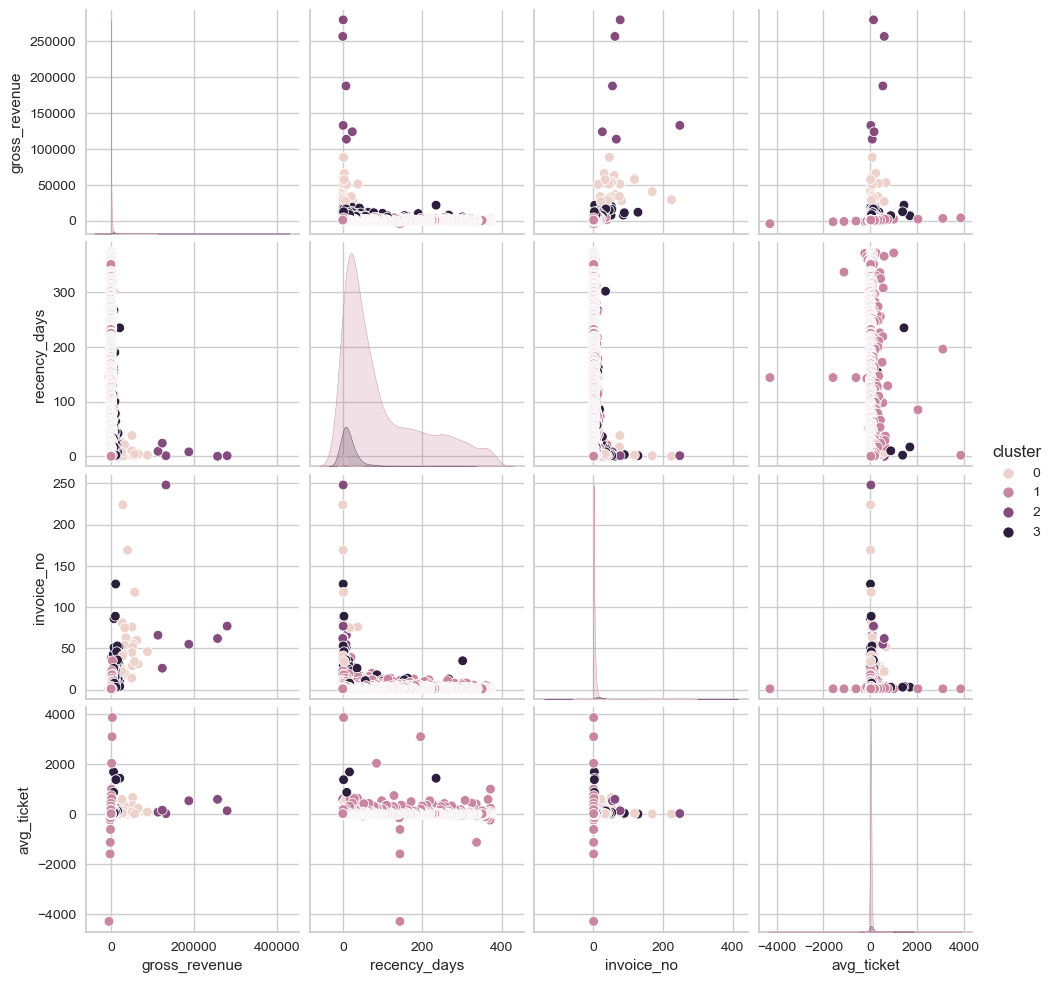

In [98]:
# Criando um DataFrame para visualização sem a coluna 'customer_id'
df_viz = df9.drop(columns='customer_id', axis=1)

# Criando um pairplot com cores definidas pelo cluster
sns.pairplot(df_viz, hue='cluster')

## 9.3. UMAP

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

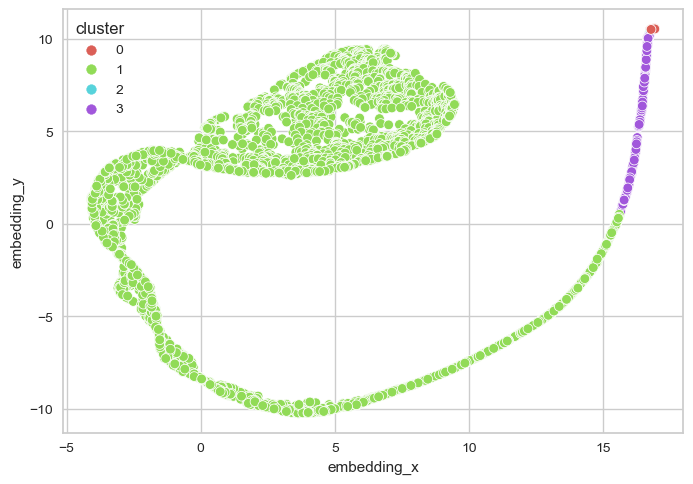

In [99]:
# Redução de dimensionalidade UMAP
reducer = umap.UMAP(n_neighbors=80, random_state=42)
embedding = reducer.fit_transform(X)

# Adicionando as coordenadas de embedding ao DataFrame
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# Plotagem dos dados de embedding com cores definidas pelo cluster
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())),
                data=df_viz)



## 9.4. Cluster Profile

In [100]:
# Número de clientes em cada cluster
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customer'] = 100 * (df_cluster['customer_id'] / df_cluster['customer_id'].sum())

# Média da receita bruta em cada cluster
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Média dos dias de recência em cada cluster
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Média do número de faturas em cada cluster
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_invoice_no, how='inner', on='cluster')

# Média do valor do tíquete em cada cluster
df_ticket = df9[['avg_ticket', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_ticket, how='inner', on='cluster')

# Exibindo o DataFrame resultante
df_cluster


,cluster,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,28,0.640439,42614.387143,6.178571,57.821429,162.862605
1,1,4071,93.115279,946.696250,96.969295,3.641120,25.359654
2,2,6,0.137237,182181.981667,7.166667,89.000000,253.626345
3,3,267,6.107045,8089.028652,20.280899,19.528090,62.783157


### Cluster 0 
- Número de clientes: 28 (0.64% dos clientes)
- Recência média: 6.18 dias
- Número médio de compras: 57.82 compras
- Receita média: $42,614.39

### Cluster 1 (Candidato à Insider)
- Número de clientes: 6 (0.14% dos clientes)
- Recência média: 7.17 dias
- Número médio de compras: 89.00 compras
- Receita média: $182,181.98

### Cluster 2
- Número de clientes: 4,071 (93.12% dos clientes)
- Recência média: 96.97 dias
- Número médio de compras: 3.64 compras
- Receita média: $946.70

### Cluster 3
- Número de clientes: 267 (6.11% dos clientes)
- Recência média: 20.28 dias
- Número médio de compras: 19.53 compras
- Receita média: $8,089.03


# 10.0. Deploy To Production